In [24]:
from sklearn.decomposition import PCA
import numpy as np
from numpy.linalg import norm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import PyQt5

## PCA of first dataset

In [107]:
with open("files_list.txt") as f :
    file_data = f.readlines()
filenames=[]
for k in enumerate(file_data) :
    filenames.append(k[1][7:].split("/")[0])

In [108]:
nev=20
with open("eigenvalues_list_"+str(nev)+".txt") as f :
    file_data = f.readlines()
eigenvalues_list = np.zeros((len(file_data),nev))
for idx,k in enumerate(file_data) :
    k = k.split("\t")[:-1]
    for nb,i in enumerate(k) :
        eigenvalues_list[idx,nb] = float(i)

In [111]:
%matplotlib qt

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents =pca.fit_transform(eigenvalues_list)
var = pca.explained_variance_ratio_

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

labels=[]
for i in range(eigenvalues_list.shape[0]):
    labels.append(filenames[i])
principalDf["label"]=labels

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

labels = list(set(filenames))

colors = matplotlib.cm.rainbow(np.linspace(0,1,len(labels)))

for label, color in zip(labels,colors):
    indicesToKeep = principalDf['label'] == label
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

In [115]:
train = np.zeros((7*9,nev))
train_labels = []
test = np.zeros((3*9,nev))
test_labels = []

i_train=0
i_test=0
for i in range(len(filenames)):
    if i%10<7:
        train[i_train]=eigenvalues_list[i]
        train_labels.append(filenames[i])
        i_train+=1
    else:
        test[i_test]=eigenvalues_list[i]
        test_labels.append(filenames[i])
        i_test+=1

In [116]:
labels=list(set(filenames))

In [118]:
def kNN(k, X, x):
    '''
    kNN classification of x
    -----------------------
        Input: 
        k: number of nearest neighbors
        X: training data           
        y: class labels of training data
        x: test instance

        return the label to be associated with x

        Hint: you may use the function 'norm' 
    '''
    m,n = X.shape
    
    #liste des distances de x à tous les autres points du dataset
    distances = norm(X-x,axis=1)
    #liste des indices triés par distance à x
    idx=distances.argsort()
    
    #on fait le compte des labels les plus présents
    c=np.zeros(max(idx)+1)
    for i in range(k):
        c[labels.index(train_labels[idx[i]])] += 1
        
    #renvoie le résultat du vote majoritaire
    label = np.argmax(c)
    
    return label

In [126]:
%matplotlib inline

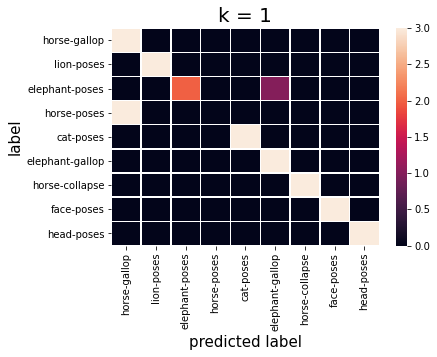

In [127]:
k=1
query=np.zeros((9,9))
for i in range(len(test)):
    idx=kNN(k,train,test[i])
    query[labels.index(test_labels[i]),idx]+=1
ax = sns.heatmap(query, linewidth=0.5, xticklabels = labels, yticklabels = labels)
plt.ylabel('label',size=15)
plt.xlabel('predicted label',size=15)
plt.title("k = "+str(k),size=20)
plt.show()

## PCA of Princeton dataset

In [105]:
labels = ["Human","Cup","Glasses","Airplane","Ant","Chair","Octopus","Table","Teddy","Hand","Plier","Fish","Bird","Spring","Armadillo","Bust","Mech","Bearing","Vase","Fourleg"]
nev=20
with open("eigenvalues_list_princeton_"+str(nev)+".txt") as f :
    file_data = f.readlines()
train = np.zeros((len(file_data)-5*20,nev))
train_labels = [labels[i//15] for i in range(len(train))]
test = np.zeros((5*20,nev))
test_labels = [labels[i//5] for i in range(len(test))]

i_train=0
i_test=0
for idx,k in enumerate(file_data) :
    k = k.split("\t")[:-1]
    if idx%20<15:
        for nb,i in enumerate(k) :
            train[i_train,nb] = float(i)
        i_train+=1
    else:
        for nb,i in enumerate(k) :
            test[i_test,nb] = float(i)
        i_test+=1

In [106]:
%matplotlib qt

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents =pca.fit_transform(train)
var = pca.explained_variance_ratio_

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf["label"]=train_labels

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

labels = list(set(train_labels))

colors = matplotlib.cm.rainbow(np.linspace(0,1,len(labels)))

for label, color in zip(labels,colors):
    indicesToKeep = principalDf['label'] == label
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

In [101]:
query=np.zeros((20,20))

def kNN(k, X, x):
    '''
    kNN classification of x
    -----------------------
        Input: 
        k: number of nearest neighbors
        X: training data           
        y: class labels of training data
        x: test instance

        return the label to be associated with x

        Hint: you may use the function 'norm' 
    '''
    m,n = X.shape
    
    #liste des distances de x à tous les autres points du dataset
    distances = norm(X-x,axis=1)
    #liste des indices triés par distance à x
    idx=distances.argsort()
    
    #on fait le compte des labels les plus présents
    c=np.zeros(max(idx)+1)
    for i in range(k):
        c[labels.index(train_labels[idx[i]])] += 1
        
    #renvoie le résultat du vote majoritaire
    label = np.argmax(c)
    
    return label

In [102]:
k=4
query=np.zeros((20,20))
for i in range(len(test)):
    idx=kNN(k,train,test[i])
    query[labels.index(test_labels[i]),idx]+=1
ax = sns.heatmap(query, linewidth=0.5, xticklabels = labels, yticklabels = labels)
plt.ylabel('label',size=15)
plt.xlabel('predicted label',size=15)
plt.title("k = "+str(k),size=20)

Text(0.5, 1.0, 'k = 4')